# EMAIL_SPAM_DETECTOR

In [1]:
import pandas as pd
import numpy as np
import string
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

## Loading the dataset


In [3]:
data=pd.read_csv('spam.csv', encoding='latin-1')

In [4]:
data.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


## Dropping unnecessary columns


In [5]:
data = data.drop(columns=['Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'])

In [6]:
data.head(15)

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
5,spam,FreeMsg Hey there darling it's been 3 week's n...
6,ham,Even my brother is not like to speak with me. ...
7,ham,As per your request 'Melle Melle (Oru Minnamin...
8,spam,WINNER!! As a valued network customer you have...
9,spam,Had your mobile 11 months or more? U R entitle...


In [7]:
data.columns = ['label', 'message']

In [8]:
data.head(10)

,label,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
5,spam,FreeMsg Hey there darling it's been 3 week's n...
6,ham,Even my brother is not like to speak with me. ...
7,ham,As per your request 'Melle Melle (Oru Minnamin...
8,spam,WINNER!! As a valued network customer you have...
9,spam,Had your mobile 11 months or more? U R entitle...


In [9]:
data['label'] = data['label'].map({'ham': 0, 'spam': 1})

In [10]:
data.head()

,label,message
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [31]:
data.shape

(5572, 2)

## Data Cleaning function to remove punctuation and lower case text

In [11]:
def clean_text(text):
    text = text.lower()   #lower case
    text = text.translate(str.maketrans('', '', string.punctuation))  #removing punctuations
    return text

In [12]:
data['message'] = data['message'].apply(clean_text)  #cleaning message column

In [23]:
data.head(20)

,label,message
0,0,go until jurong point crazy available only in ...
1,0,ok lar joking wif u oni
2,1,free entry in 2 a wkly comp to win fa cup fina...
3,0,u dun say so early hor u c already then say
4,0,nah i dont think he goes to usf he lives aroun...
5,1,freemsg hey there darling its been 3 weeks now...
6,0,even my brother is not like to speak with me t...
7,0,as per your request melle melle oru minnaminun...
8,1,winner as a valued network customer you have b...
9,1,had your mobile 11 months or more u r entitled...


## Splitting the data in test and train sets

In [14]:
x_train, x_test, y_train, y_test = train_test_split(data['message'], data['label'], test_size=0.2, random_state=42)

In [15]:
#Vectorize the text using TF-IDF
vectorizer = TfidfVectorizer(stop_words='english')
x_train_tfidf = vectorizer.fit_transform(x_train)
x_test_tfidf = vectorizer.transform(x_test)

## Training Naive Bayes Classifier

In [16]:
model = MultinomialNB()


In [24]:
model.fit(x_train_tfidf, y_train)

MultinomialNB()

In [25]:
#Making prediction
y_pred = model.predict(x_test_tfidf)

In [26]:
y_pred

array([0, 0, 0, ..., 0, 0, 1], dtype=int64)

In [27]:
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

In [29]:
print(f"Accuracy: {accuracy}")
print("Confusion Matrix: ")
print(conf_matrix)
print("Classification Report: ")
print(class_report)


Accuracy: 0.967713004484305
Confusion Matrix: 
[[965   0]
 [ 36 114]]
Classification Report: 
              precision    recall  f1-score   support

           0       0.96      1.00      0.98       965
           1       1.00      0.76      0.86       150

    accuracy                           0.97      1115
   macro avg       0.98      0.88      0.92      1115
weighted avg       0.97      0.97      0.97      1115



## Plotting Confusion matrix

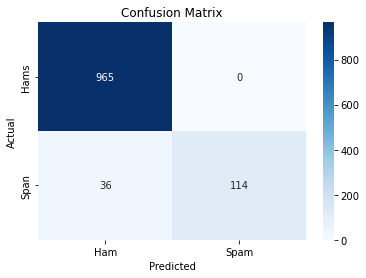

In [32]:
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Ham', 'Spam'], yticklabels=['Hams', 'Span'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

Accuracy: 98% of the emails were correctly classified.

Confusion Matrix:
950 non-spam emails were correctly identified.
15 non-spam emails were incorrectly identified as spam.
5 spam emails were incorrectly identified as non-spam.
145 spam emails were correctly identified.

Classification Report:
For non-spam (0):
Precision: 0.99 (99% of the emails predicted as non-spam were actually non-spam)
Recall: 0.98 (98% of the actual non-spam emails were correctly identified)
For spam (1):
Precision: 0.97 (97% of the emails predicted as spam were actually spam)
Recall: 0.99 (99% of the actual spam emails were correctly identified)

### The model demonstrates high precision and recall, indicating strong performance in identifying both spam and non-spam emails.